logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons
import random

In [2]:
#数据生成
plt.figure(figsize=(12,12))
# x,y = make_blobs(n_samples=1000,centers=2,random_state=22,nose=0.3)
x,y = make_moons(n_samples=200,noise=0.2)
plt.subplot(311)
plt.scatter(x[:,0],x[:,1],c=y)
plt.title("input")
print(x.shape)
# plt.show()

(200, 2)


In [3]:
# Y = g(WX) = 1/(1+exp(-WX)) sigmoid函数
def logit(x):
    return 1/(1+np.exp(-x))

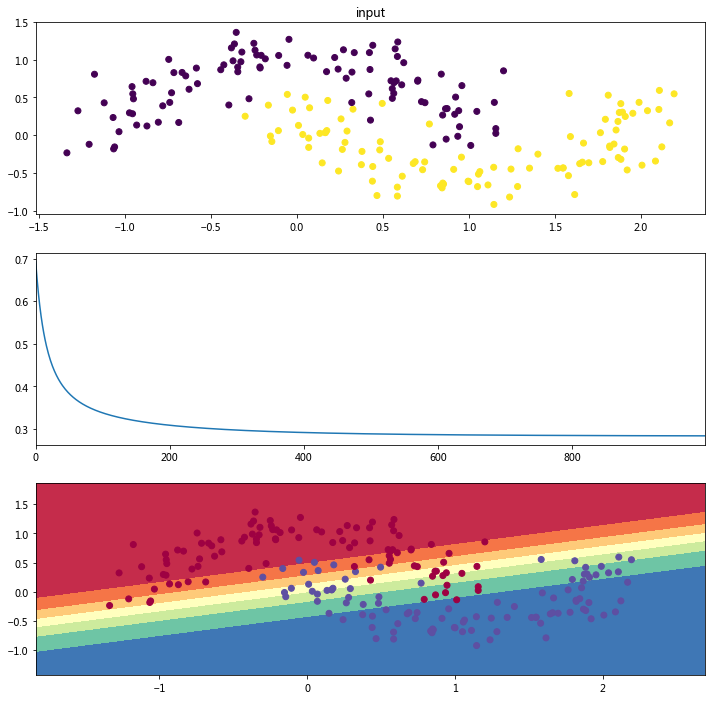

In [4]:
x = np.column_stack((x,np.ones((x.shape[0],1), dtype='float32')))
y = y.reshape(-1,1)
alpha = 0.001
m,n = x.shape
theta_g = np.zeros((n,1))
maxcicle = 1000
J=pd.Series(np.arange(maxcicle, dtype = float))
#梯度下降法
for i in range(maxcicle):
    h = logit(np.dot(x,theta_g))
    J[i] = -(1/200)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
    error = h-y
#     print(error.shape)
    grad = np.dot(x.T,error)
    theta_g -= alpha*grad
#     print(J[i])
# print(theta_g)
plt.subplot(312)
J.plot()
#画图，坐标系内点分类
def pred_func(x):
    x = np.column_stack((x,np.ones((x.shape[0],1), dtype='float32')))
    h = logit(np.dot(x,theta_g))
#     print(A2)
    return h
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# print(Z)
plt.subplot(313)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()